#Importing Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install googletrans==4.0.0.0-rc1
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=1032f7c368c6a712da9b324b2c43fa42a59e76526edfc6ac0412a6d6e0949523
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans

In [3]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 66.5 MB/s eta 0:00:00


In [4]:
#Importing the libraries which are required.
import pandas as pd
import string, cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from googletrans import Translator
import emoji
from tqdm import tqdm_notebook as tq
import googletrans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
#Importing the libraries which are required.
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.utils.np_utils import to_categorical
from sklearn import metrics
from sklearn.metrics import classification_report
import tensorflow as tf
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import json
import ast
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0
import joblib
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

#Importing the libraries which are required.

import pandas as pd
import nltk, time
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import re
import matplotlib.pyplot as plt
import collections
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

%matplotlib inline

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#Read dataset

In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/sentiment_analysis_twitter/Twitter_Data.csv')
df_data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
df_data = df_data.dropna()
df_data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
np.unique(df_data['category'].values, return_counts=True)

(array([-1.,  0.,  1.]), array([35509, 55211, 72249]))

In [ ]:
df_data.dtypes

clean_text     object
category      float64
dtype: object

In [ ]:
filtered = []
y = []
for i in tq(range(0, 162969)):
  try:
    review = re.sub('[^a-zA-Z]', ' ', df_data['clean_text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    filtered.append(review)
    if df_data['category'][i] == -1.0:
      y.append('Negative')
    elif df_data['category'][i] == 0.0:
      y.append('Neutral')
    elif df_data['category'][i] == 1.0:
      y.append('Postive')
    
  except:
    pass

df_data.iloc[1].values, filtered[1]

  0%|          | 0/162969 [00:00<?, ?it/s]

(array(['talk all the nonsense and continue all the drama will vote for modi ',
        0.0], dtype=object),
 'talk nonsens continu drama vote modi')

In [ ]:
y = np.array(y)
y.shape

(162958,)

In [ ]:
df_data.iloc[:, 0]

0         when modi promised “minimum government maximum...
1         talk all the nonsense and continue all the dra...
2         what did just say vote for modi  welcome bjp t...
3         asking his supporters prefix chowkidar their n...
4         answer who among these the most powerful world...
                                ...                        
162975    why these 456 crores paid neerav modi not reco...
162976    dear rss terrorist payal gawar what about modi...
162977    did you cover her interaction forum where she ...
162978    there big project came into india modi dream p...
162979    have you ever listen about like gurukul where ...
Name: clean_text, Length: 162969, dtype: object

In [ ]:
index = 100
print(df_data.iloc[index])
print('##########')
print(y[index], filtered[index])

clean_text    why limited here are other prefixes for twitte...
category                                                    1.0
Name: 100, dtype: object
##########
Postive limit prefix twitter perhap accur captur state citizen


In [ ]:
cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(filtered).toarray()
x.shape, y.shape

((162958, 1500), (162958,))

In [ ]:
f = open("/content/drive/MyDrive/sentiment_analysis_twitter/cv1.pkl", "wb")
pickle.dump(cv, f)
f.close()


In [ ]:
collections.Counter(y)

Counter({'Negative': 35507, 'Neutral': 55207, 'Postive': 72244})

In [ ]:
# Displaying the most common words in the dataset

#from counter import Counter
all_words = []

for line in filtered:
  words = line.split()
  for word in words:
    all_words.append(word.lower())

collections.Counter(all_words).most_common(10)

[('modi', 163473),
 ('india', 31038),
 ('bjp', 15151),
 ('peopl', 14431),
 ('like', 13443),
 ('congress', 12855),
 ('elect', 12790),
 ('vote', 12529),
 ('narendra', 11471),
 ('say', 11291)]

In [ ]:
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


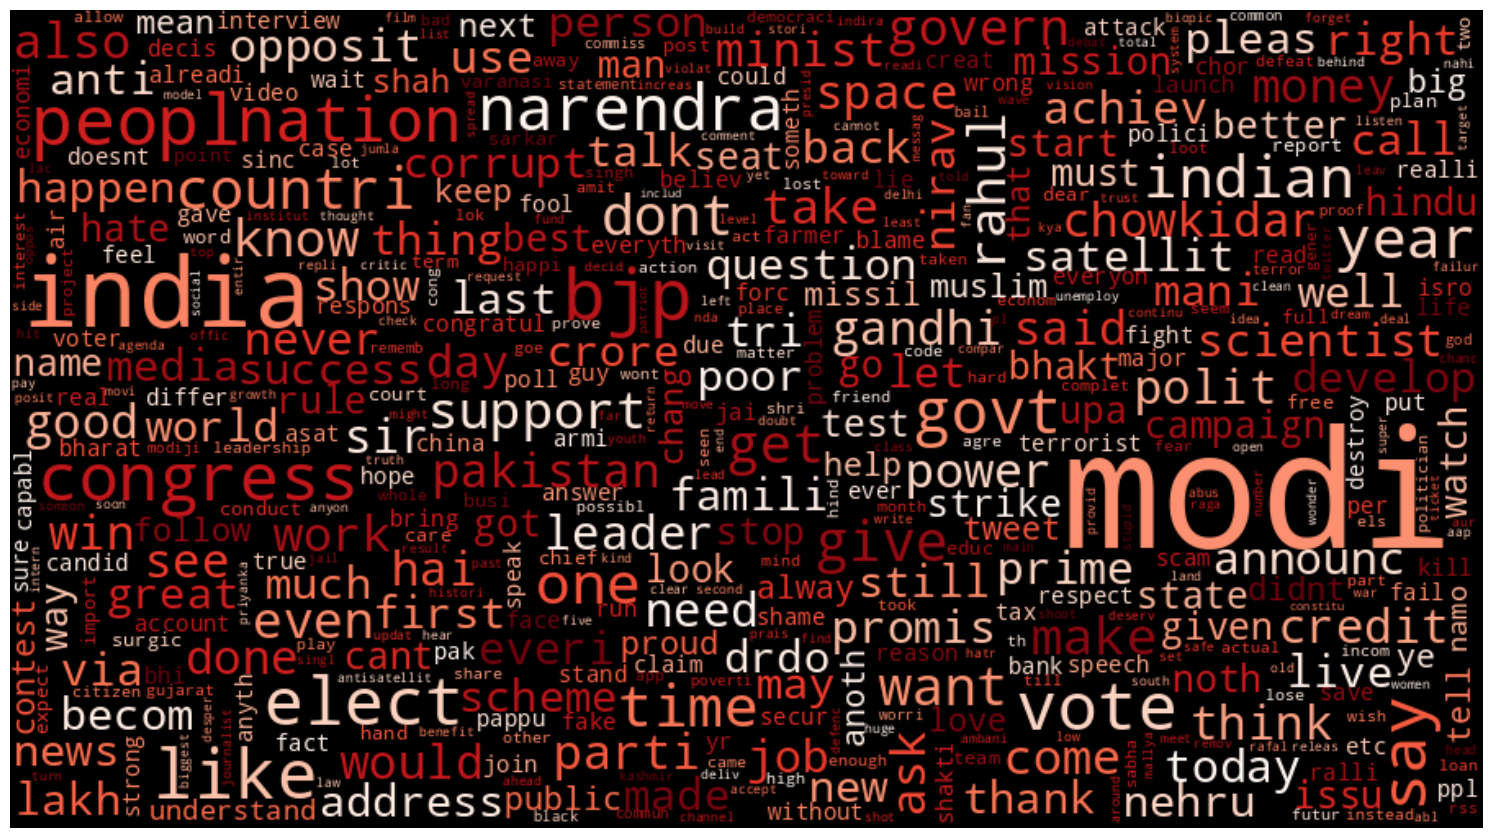

In [ ]:
# Creating a word Cloud
from wordcloud import WordCloud

all_words = []

for line in filtered:
  words = line.split()
  for word in words:
    all_words.append(word.lower())

wordfreq = collections.Counter(all_words)
wordcloud = WordCloud(width=900,height=500, max_words=500, max_font_size=100, relative_scaling=0.5, colormap='Reds',
                      normalize_plurals = True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(19,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y[0], y[-1]

(0, 1)

In [ ]:
labels_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
labels_mapping

{'Negative': 0, 'Neutral': 1, 'Postive': 2}

In [ ]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
class_weights = class_weight.compute_class_weight(
    class_weight='balanced', classes=np.unique(y), y=y)
class_weights

array([1.52982041, 0.98392112, 0.75188712])

In [ ]:
class_weight = [1.52982041, 0.98392112, 0.75188712]
class_weights = {}
for i in range(len(class_weight)):
  class_weights[i] = class_weight[i]
class_weights

{0: 1.52982041, 1: 0.98392112, 2: 0.75188712}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=87,stratify=y) # rs = 77(88)
x=y=0

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((130366, 1500), (32592, 1500), (130366,), (32592,))

In [ ]:
X_train[0], y_train[0]

(array([0, 0, 0, ..., 0, 0, 0]), 1)

In [ ]:
classifier = linear_model.LogisticRegression(C=1.5,)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.5)

In [ ]:
classifier.classes_

array([0, 1, 2])

In [ ]:
y_pred = classifier.predict(X_test)
y_pred.shape

(32592,)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[ 4762  1246  1093]
 [  342 10077   623]
 [  907  1762 11780]]


In [ ]:
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred, average='macro')
score3= recall_score(y_test,y_pred, average='macro')

print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


Accuracy is  81.67 %
Precision is  0.81
Recall is  0.8


In [ ]:
import joblib
joblib.dump(classifier, '/content/drive/MyDrive/sentiment_analysis_twitter/lg.pkl')

['/content/drive/MyDrive/sentiment_analysis_twitter/lg.pkl']

#Inference

In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/sentiment_analysis_twitter/Twitter_Data.csv')
df_data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
lg = joblib.load('/content/drive/MyDrive/sentiment_analysis_twitter/lg.pkl')

with open("/content/drive/MyDrive/sentiment_analysis_twitter/cv1.pkl", "rb") as f:
  cv = pickle.load(f)
cv, lg, lg.classes_

(CountVectorizer(max_features=1500),
 LogisticRegression(C=1.5),
 array([0, 1, 2]))

In [ ]:
index = 11
print(df_data.iloc[index]['clean_text'])
if df_data.iloc[index]['category'] == -1.0:
  print('Negative')
elif df_data.iloc[index]['category'] == 0.0:
  print('Neutral')
elif df_data.iloc[index]['category'] == 1.0:
  print('Postive')

print('#############')
filtered1 = []
review = re.sub('[^a-zA-Z]', ' ', df_data['clean_text'][index])
#review = re.sub('[^a-zA-Z]', ' ', 'bad product')
review = review.lower()
review = review.split()
ps = PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
review = ' '.join(review)
filtered1.append(review)

filtered1


hope tuthukudi people would prefer honest well behaved nationalist courageous likly minister modi cabinet vote benifit thuthukudi 
Postive
#############


['hope tuthukudi peopl would prefer honest well behav nationalist courag likli minist modi cabinet vote benifit thuthukudi']

In [ ]:
test = cv.transform(filtered1).toarray()
test.shape

(1, 1500)

In [ ]:
pred = lg.predict(test)
pred

array([2])

In [ ]:
pred = lg.predict_proba(test)
pred

array([[0.01682428, 0.00971078, 0.97346494]])

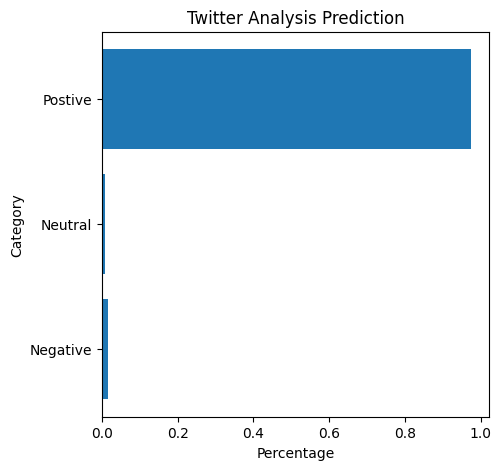

In [ ]:
output_labels = ['Negative', 'Neutral', 'Postive']
plt.figure(figsize=(5, 5), )
y_pos = np.arange(len(output_labels))
plt.barh(y_pos,pred[0])
plt.yticks(y_pos,output_labels)
plt.title('Twitter Analysis Prediction')
plt.ylabel('Category')
plt.xlabel('Percentage')
plt.show()

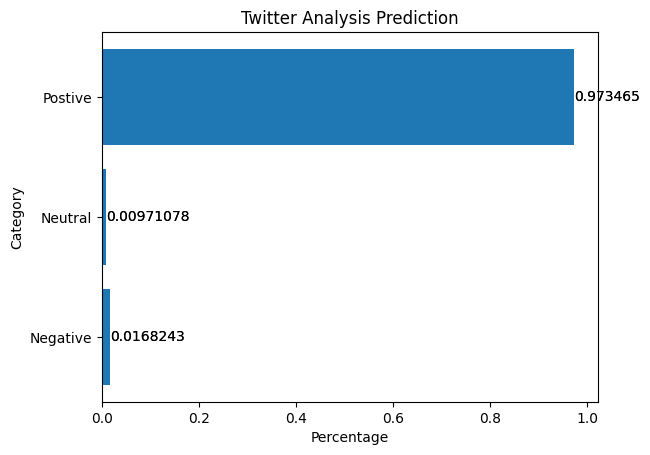

In [ ]:
output_labels = ['Negative', 'Neutral', 'Postive']
fig, ax = plt.subplots()
y_pos = np.arange(len(output_labels))
bars = ax.barh(y_pos, pred[0])
ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)
plt.yticks(y_pos,output_labels)
plt.title('Twitter Analysis Prediction')
plt.ylabel('Category')
plt.xlabel('Percentage')
plt.show()


#Gradio

In [ ]:
!pip install --quiet gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.4 MB/s eta 0

In [ ]:
import gradio as gr
import tensorflow as tf
import requests

lg = joblib.load('/content/drive/MyDrive/sentiment_analysis_twitter/lg.pkl')
output_labels = ['Negative', 'Neutral', 'Postive']

with open("/content/drive/MyDrive/sentiment_analysis_twitter/cv1.pkl", "rb") as f:
  cv = pickle.load(f)

def pred(text):

  filtered1 = []
  review = re.sub('[^a-zA-Z]', ' ', text)
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  filtered1.append(review)

  test = cv.transform(filtered1).toarray()
  pred = lg.predict_proba(test)
  pred_index = np.argmax(pred, axis=1)[0]
  print('pred_index', pred_index)

  plt.figure(figsize=(3, 3), )
  fig, ax = plt.subplots()
  y_pos = np.arange(len(output_labels))
  bars = ax.barh(y_pos, pred[0])
  ax.bar_label(bars)
  for bars in ax.containers:
      ax.bar_label(bars)
  plt.yticks(y_pos,output_labels)
  plt.title('Twitter Analysis Prediction')
  plt.ylabel('Category')
  plt.xlabel('Percentage')
  plt.savefig('output.png')
  
  return output_labels[pred_index], cv2.imread('output.png')


In [ ]:
#only text
with gr.Blocks() as demo:
    chatbot = gr.Chatbot()
    msg = gr.Textbox()
    img = gr.Image()

    clear = gr.Button("Clear")

    def respond(message, chat_history):
        bot_message, image = pred(message)
        chat_history.append((message, bot_message))
        time.sleep(1)
        return "", chat_history

    msg.submit(respond, [msg, chatbot], [msg, chatbot])
    clear.click(lambda: None, None, chatbot, queue=False)



In [ ]:
#with graph
with gr.Blocks() as demo:
    chatbot = gr.Chatbot()
    msg = gr.Textbox()
    img = gr.Image(shape=(200, 200))

    clear = gr.Button("Clear")

    def respond(message, chat_history):
        bot_message, image = pred(message)
        chat_history.append((message, bot_message))
        time.sleep(1)
        return "", chat_history, image

    msg.submit(respond, [msg, chatbot], [msg, chatbot, img])
    clear.click(lambda: None, None, chatbot, queue=False)
    clear.click(lambda: None, None, img, queue=False)



In [ ]:
demo.close()
demo.launch(share=True)

Closing server running on port: 7860
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://33e05ee91a8bc39d5d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
